In [1]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
from qiskit import *
from qiskit.tools.monitor import job_monitor

import qiskit.quantum_info as qi

In [2]:
Aer.backends()
simulator = Aer.get_backend('aer_simulator')


In [3]:
# Set initial state to generated statevector
circ = QuantumCircuit(7, 6)
circ.x(6)
circ.barrier()
circ.h(0)
circ.h(1)
circ.h(2)
circ.h(3)
circ.h(4)
circ.h(5)
circ.h(6)
circ.barrier()
circ.x(0)
circ.x(2)
circ.x(3)
circ.barrier()
circ.h(0)
circ.h(1)
circ.h(2)
circ.h(3)
circ.h(4)
circ.h(5)
circ.h(6)
circ.barrier()
circ.measure(range(6), range(6))
circ.draw()

░ ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌─┐               
q_0: ──────░─┤ H ├─░─┤ X ├─░─┤ H ├─░─┤M├───────────────
           ░ ├───┤ ░ └───┘ ░ ├───┤ ░ └╥┘┌─┐            
q_1: ──────░─┤ H ├─░───────░─┤ H ├─░──╫─┤M├────────────
           ░ ├───┤ ░ ┌───┐ ░ ├───┤ ░  ║ └╥┘┌─┐         
q_2: ──────░─┤ H ├─░─┤ X ├─░─┤ H ├─░──╫──╫─┤M├─────────
           ░ ├───┤ ░ ├───┤ ░ ├───┤ ░  ║  ║ └╥┘┌─┐      
q_3: ──────░─┤ H ├─░─┤ X ├─░─┤ H ├─░──╫──╫──╫─┤M├──────
           ░ ├───┤ ░ └───┘ ░ ├───┤ ░  ║  ║  ║ └╥┘┌─┐   
q_4: ──────░─┤ H ├─░───────░─┤ H ├─░──╫──╫──╫──╫─┤M├───
           ░ ├───┤ ░       ░ ├───┤ ░  ║  ║  ║  ║ └╥┘┌─┐
q_5: ──────░─┤ H ├─░───────░─┤ H ├─░──╫──╫──╫──╫──╫─┤M├
     ┌───┐ ░ ├───┤ ░       ░ ├───┤ ░  ║  ║  ║  ║  ║ └╥┘
q_6: ┤ X ├─░─┤ H ├─░───────░─┤ H ├─░──╫──╫──╫──╫──╫──╫─
     └───┘ ░ └───┘ ░       ░ └───┘ ░  ║  ║  ║  ║  ║  ║ 
c: 6/═════════════════════════════════╩══╩══╩══╩══╩══╩═
                                      0  1  2  3  4  5

In [4]:
# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
result = backend.run(transpile(circ, backend), shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'000000': 1000}


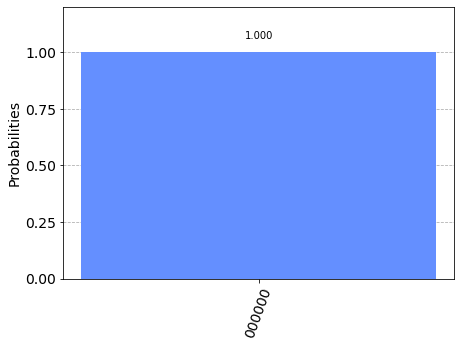

In [5]:
plot_histogram(counts)